In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.environ['PHD_CODE']
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
import cv2
import math
import multiprocessing as mp
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'
plt.gray()

In [3]:
from epypes import pipeline
from epypes import compgraph

from rpa import cbcalib
from rpa.io import open_image, sorted_glob

In [4]:
imfiles = sorted_glob(opj(CODE_DIR, 'DATA/IMG/calib/opencv_left/*.jpg'))
images = [open_image(f, cv2.IMREAD_GRAYSCALE) for f in imfiles]
psize = (9, 6)
sq_size = 10

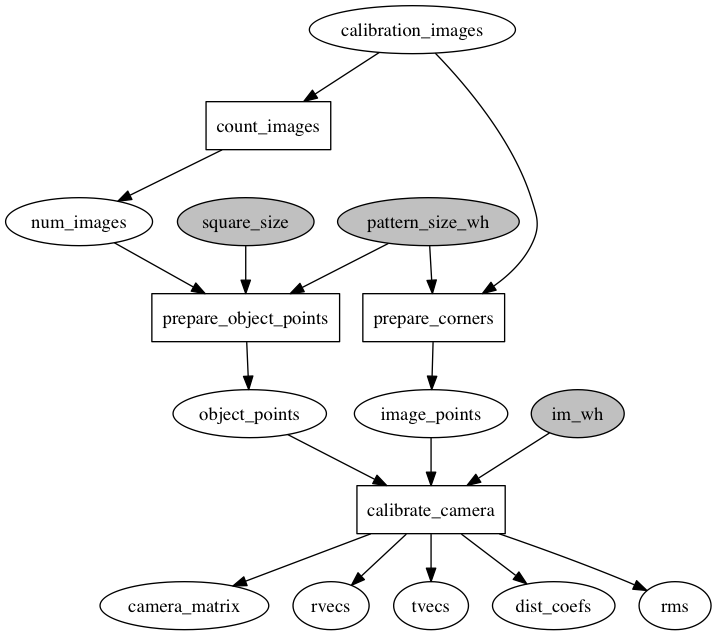

In [5]:
cg_calib = cbcalib.CGCalibrateCamera()

runner = compgraph.CompGraphRunner(cg_calib, frozen_tokens={
    'im_wh': cbcalib.get_im_wh(images[0]),
    'pattern_size_wh': psize,
    'square_size': sq_size
    
})

nxpd.draw(runner.token_manager.to_networkx())

In [6]:
runner.run(calibration_images=images)

In [7]:
runner.token_value('camera_matrix')

array([[ 532.79536562,    0.        ,  342.45825163],
       [   0.        ,  532.91928338,  233.90060514],
       [   0.        ,    0.        ,    1.        ]])

In [8]:
runner.token_value('dist_coefs')

array([[ -2.81086258e-01,   2.72581010e-02,   1.21665908e-03,
         -1.34204274e-04,   1.58514023e-01]])

In [9]:
print('Number of calibration images opened: ', len(runner.token_value('calibration_images')))
print('Number of images with good corners', len(runner.token_value('image_points')))

Number of calibration images opened:  13
Number of images with good corners 13


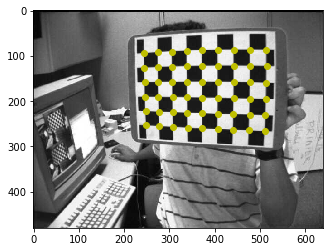

In [10]:
plt.figure()
plt.imshow(runner['calibration_images'][0])
plt.plot(runner['image_points'][0][:, 0], runner['image_points'][0][:, 1], 'yo')